# UseCase Unit II
### Name: Adiel Nefthali Delgado Silva

### Import Libraries

In [310]:
from imblearn.over_sampling import SMOTE
%env SCIPY_ARRAY_API=1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

env: SCIPY_ARRAY_API=1


### Load the Dataset

In [311]:
df = pd.read_csv("diabetes.csv")

# Exploratory Data Analysis

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [313]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [314]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

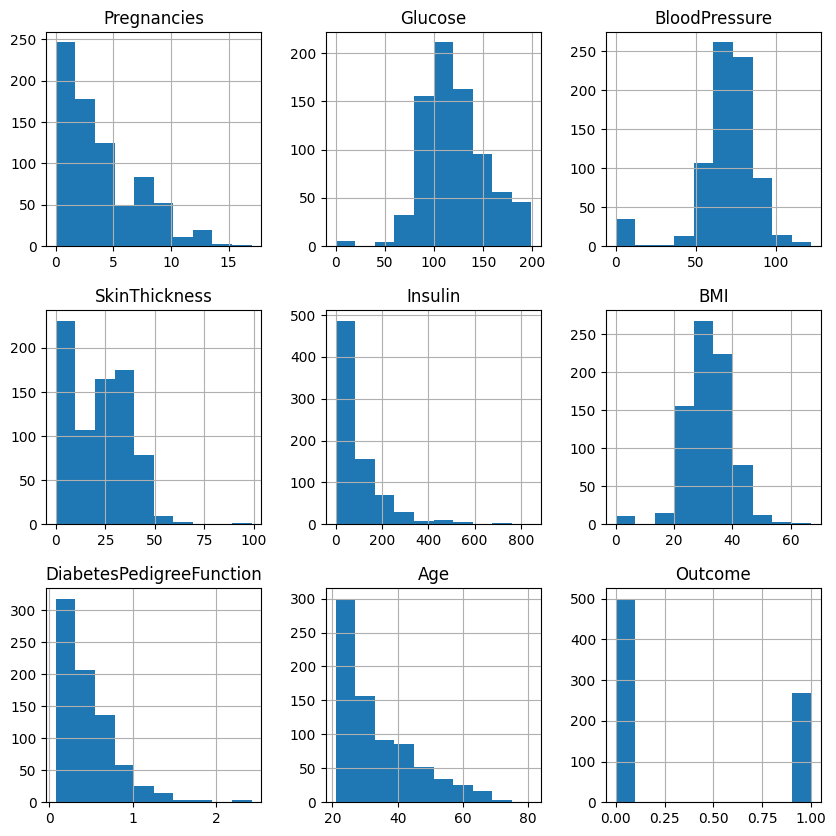

In [315]:
# Distribución de Cada Característica (Histogramas)
df.hist(figsize=(10,10))

#### Distribuciones:
-   Sesgadas a la Derecha: Las variables Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction y Age muestran un claro sesgo a la derecha. Esto significa que la mayoría de los pacientes tienen valores bajos en estas características, pero hay unos pocos con valores significativamente altos.

-   Aproximadamente Normales: Glucose, BloodPressure y BMI parecen tener una distribución que se asemeja a una campana (distribución normal)

-   Binaria: La variable Outcome no es continua, sino binaria (solo toma valores de 0 o 1).

#### Outliers in Each Feature

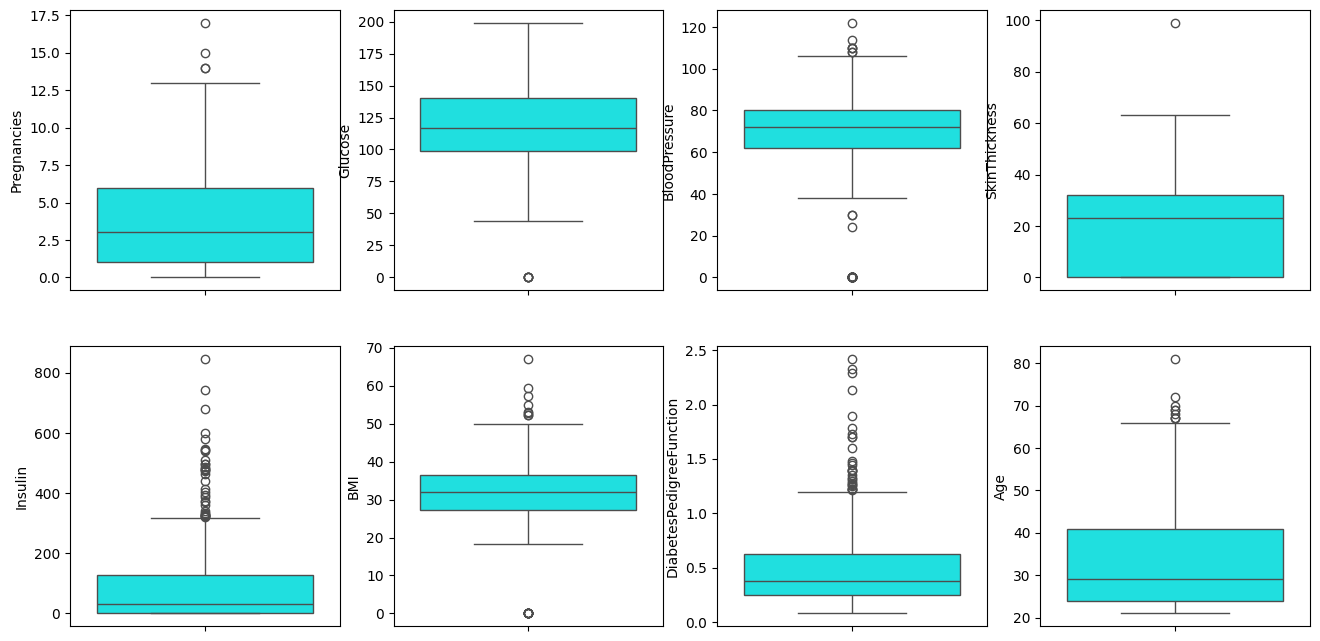

In [316]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(16,8))
for i in enumerate(features):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(df[i[1]], color='cyan')

#### Análisis Descriptivo Inicial

Las variables Insulin, DiabetesPedigreeFunction, SkinThickness y Age presentan una cantidad considerable de valores atípicos

Las columnas Glucose, BloodPressure, SkinThickness, Insulin y BMI contienen ceros que representan datos faltantes.

#### Creating the Re-Usable Functions

In [317]:
def plot_class_imbalance(target_var, title):
    #Visualiza el balance de clases de la variable objetivo.

    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_var, data=df)
    plt.title(title)
    plt.show()

def plot_univariate_analysis(var, var_title):
    #Realiza un análisis univariado mostrando un boxplot, histograma y curva de densidad.

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(f"Análisis Univariado de {var_title}", fontsize=16)

    # Boxplot para identificar outliers
    sns.boxplot(data=df, y=var, ax=ax[0])
    ax[0].set_ylabel(var_title)
    ax[0].set_title("Boxplot")

    # Histograma para ver la distribución
    sns.histplot(data=df, x=var, ax=ax[1])
    ax[1].set_xlabel(var_title)
    ax[1].set_title("Histograma")

    # Curva de densidad (KDE)
    sns.kdeplot(data=df, x=var, ax=ax[2], fill=True)
    ax[2].set_xlabel(var_title)
    ax[2].set_title("Curva de Densidad")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_correlation_heatmap(data, title):
    # Visualiza la matriz de correlación de los datos.
    
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(title)
    plt.show()

def plot_feature_vs_outcome(feature_var, feature_title):
    #Compara la distribución de una característica para cada valor de la variable objetivo.
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle(f"Distribución de {feature_title} vs. Outcome", fontsize=16)
    
    # Boxplot
    sns.boxplot(data=df, x='Outcome', y=feature_var, ax=ax[0])
    ax[0].set_xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
    ax[0].set_ylabel(feature_title)
    ax[0].set_title("Boxplot Comparativo")

    # KDE Plot
    sns.kdeplot(data=df, x=feature_var, hue='Outcome', fill=True, ax=ax[1])
    ax[1].set_xlabel(feature_title)
    ax[1].set_title("Curva de Densidad Comparativa")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

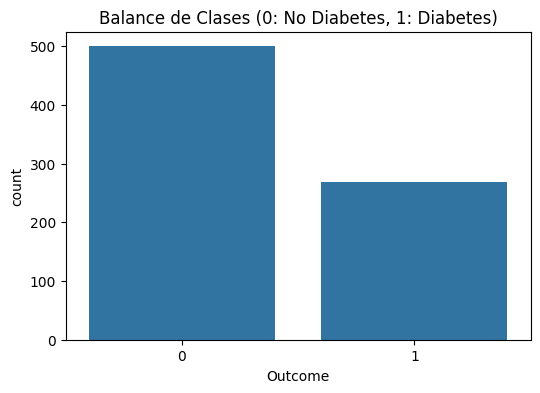

In [318]:
# 1. Gráfico de desbalance de clases para 'Outcome'
plot_class_imbalance('Outcome', 'Balance de Clases (0: No Diabetes, 1: Diabetes)')

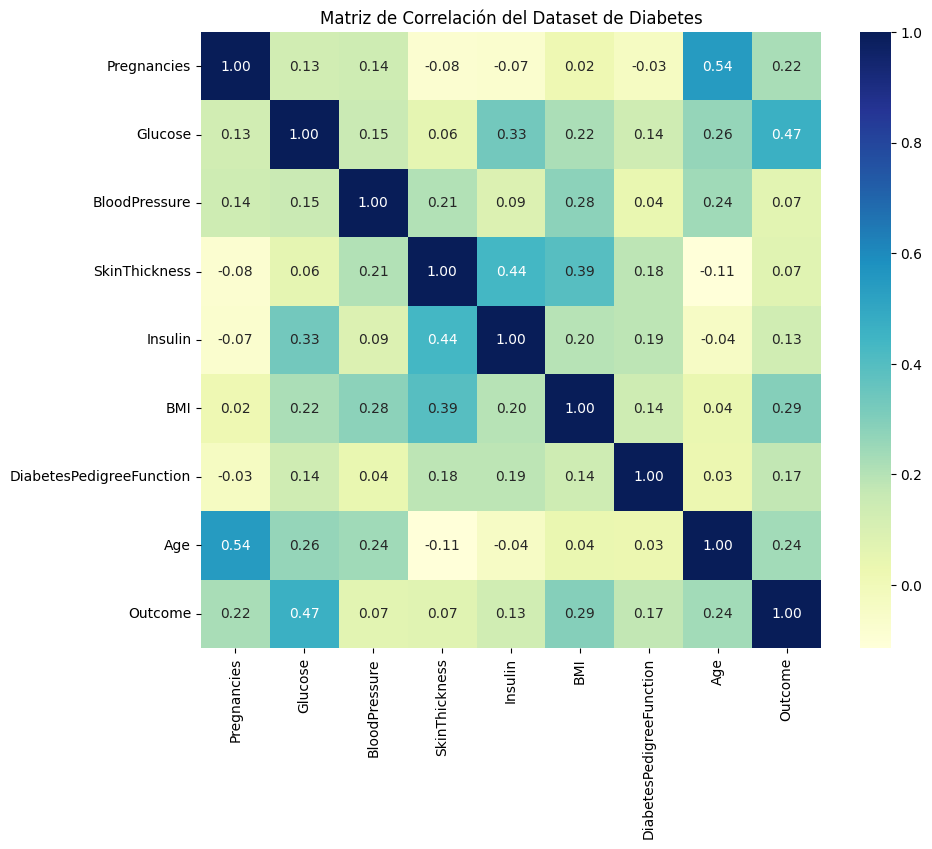

In [319]:
# 2. Matriz de correlación
plot_correlation_heatmap(df, 'Matriz de Correlación del Dataset de Diabetes')

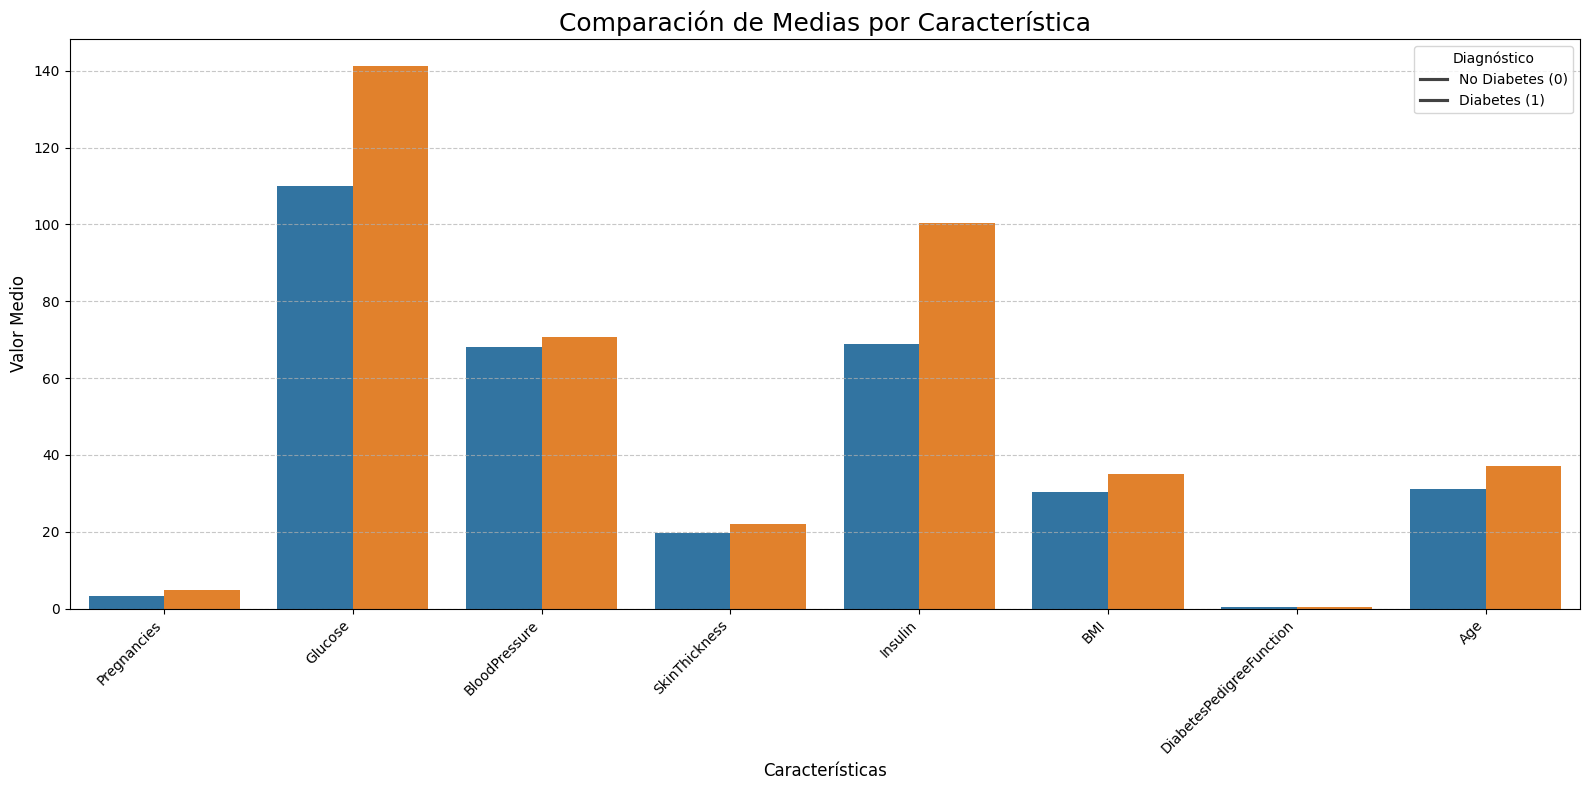

In [320]:
mean_by_outcome = df.groupby('Outcome').mean().reset_index()

df_melted = mean_by_outcome.melt(id_vars='Outcome', 
                                         var_name='Feature', 
                                         value_name='Mean')

plt.figure(figsize=(16, 8))

sns.barplot(
    data=df_melted,
    x='Feature',      
    y='Mean',          
    hue='Outcome',
)

# 4. Mejorar la presentación del gráfico
plt.title('Comparación de Medias por Característica', fontsize=18)
plt.ylabel('Valor Medio', fontsize=12)
plt.xlabel('Características', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diagnóstico', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

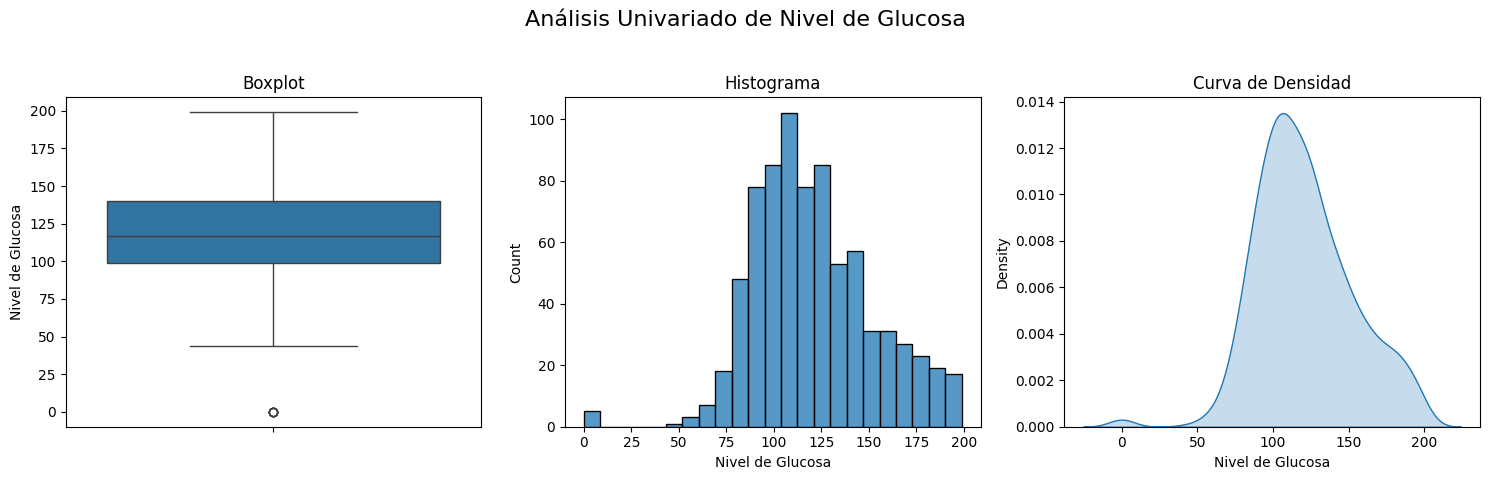

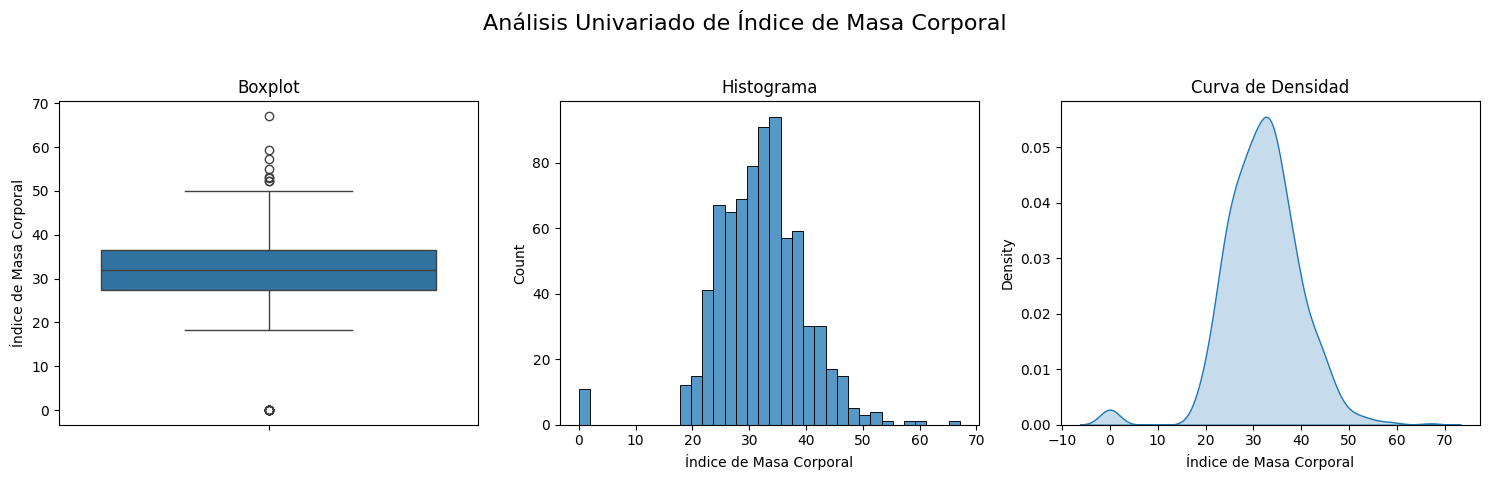

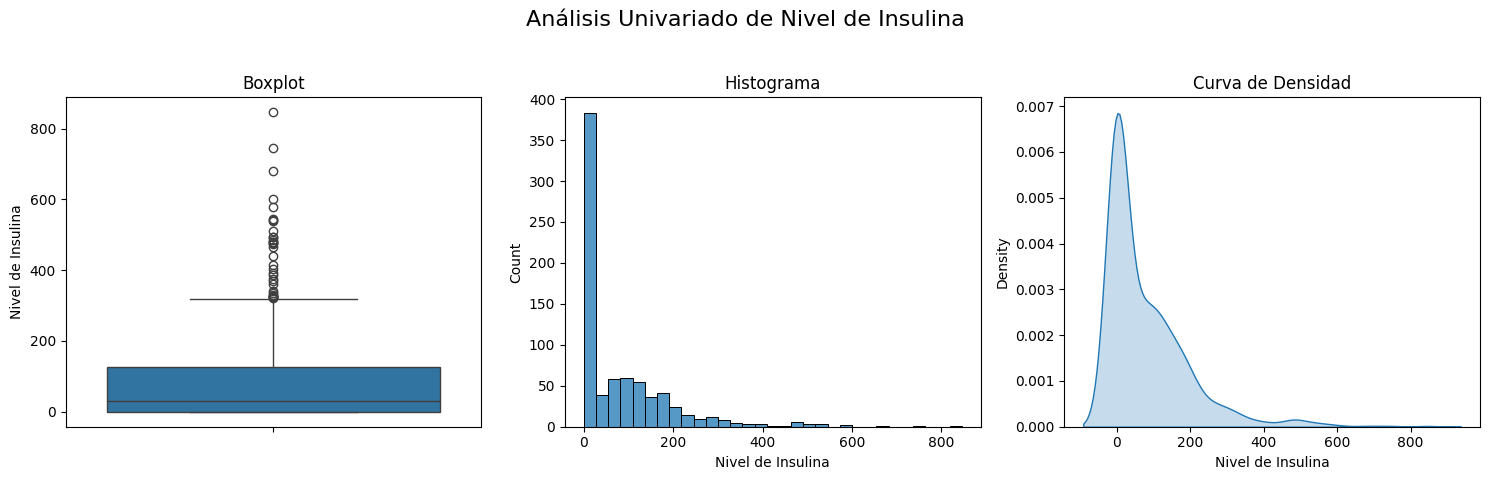

In [321]:
# 3. Análisis de Glucosa
plot_univariate_analysis("Glucose", "Nivel de Glucosa")

# 4. Análisis de BMI (Índice de Masa Corporal)
plot_univariate_analysis("BMI", "Índice de Masa Corporal")

# 5. Análisis de Insulina (¡Notarás muchos outliers aquí!)
plot_univariate_analysis("Insulin", "Nivel de Insulina")

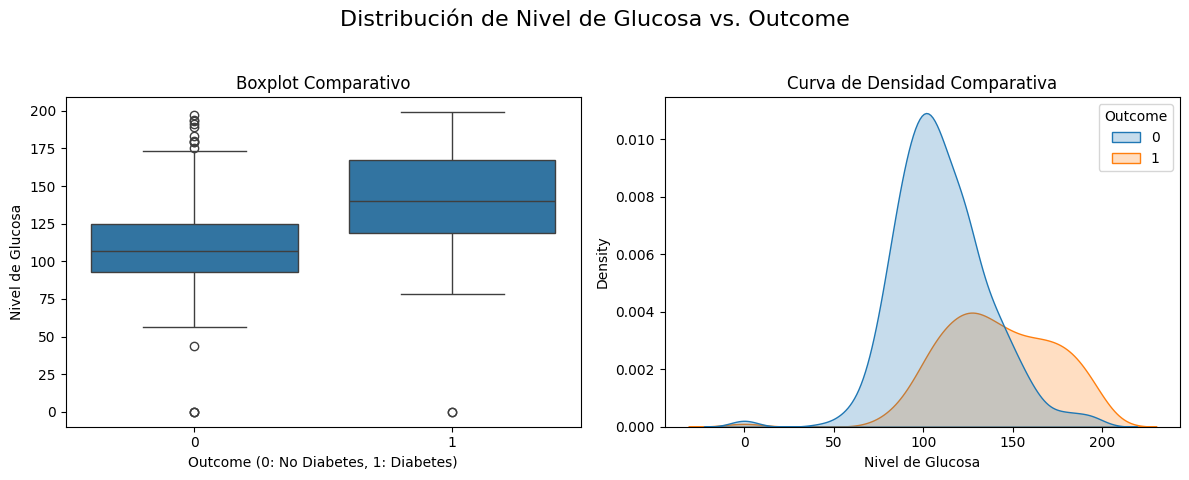

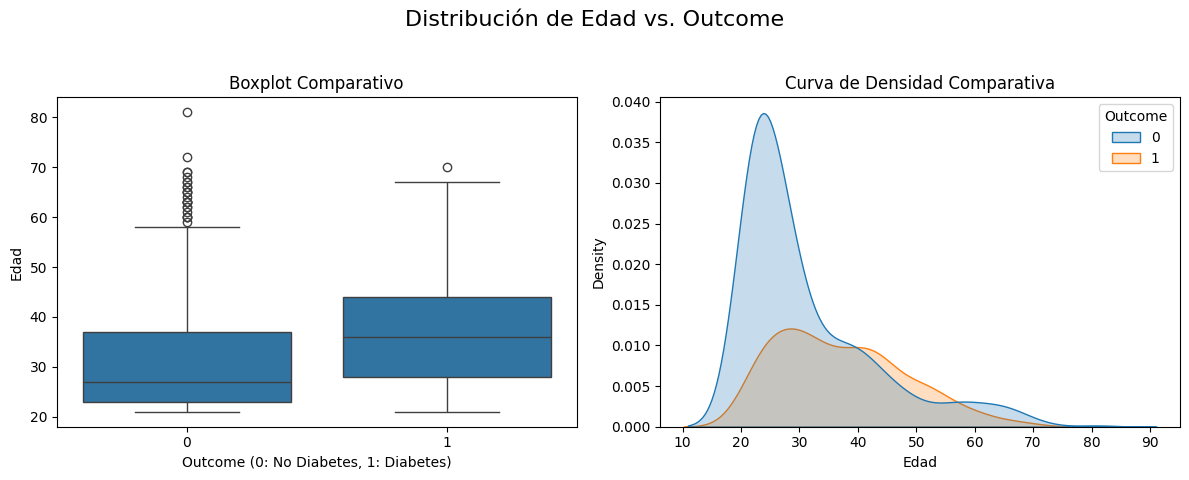

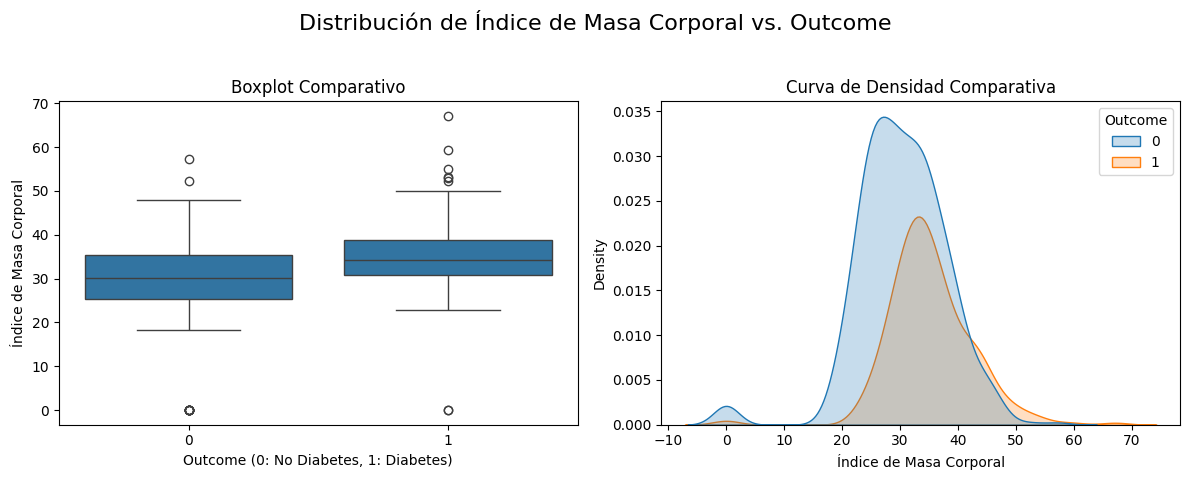

In [322]:
# 6. Comparativa de Glucosa vs Outcome
plot_feature_vs_outcome("Glucose", "Nivel de Glucosa")

# 7. Comparativa de Edad vs Outcome
plot_feature_vs_outcome("Age", "Edad")

# 8. Comparativa de BMI vs Outcome
plot_feature_vs_outcome("BMI", "Índice de Masa Corporal")

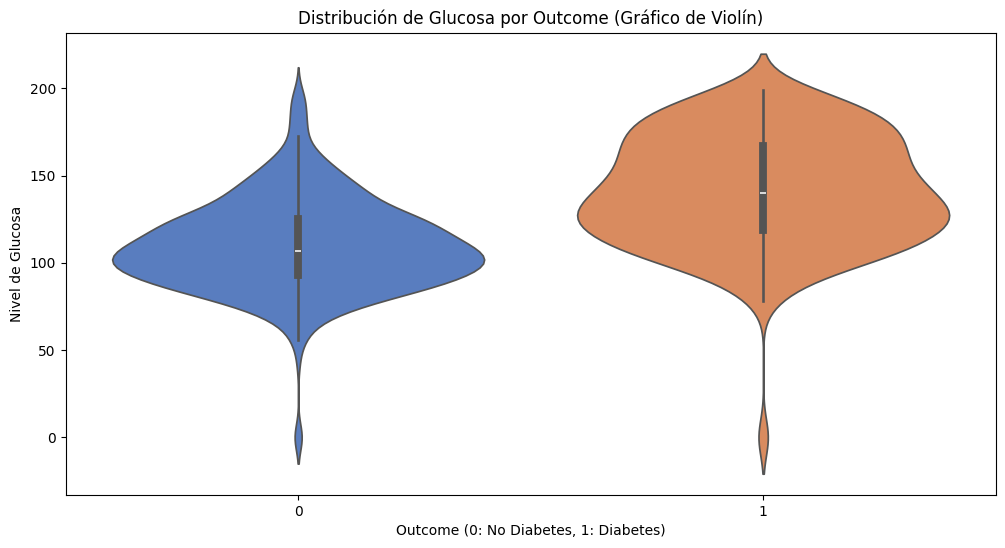

In [323]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Outcome', y='Glucose', palette='muted')
plt.title('Distribución de Glucosa por Outcome (Gráfico de Violín)')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Nivel de Glucosa')
plt.show()

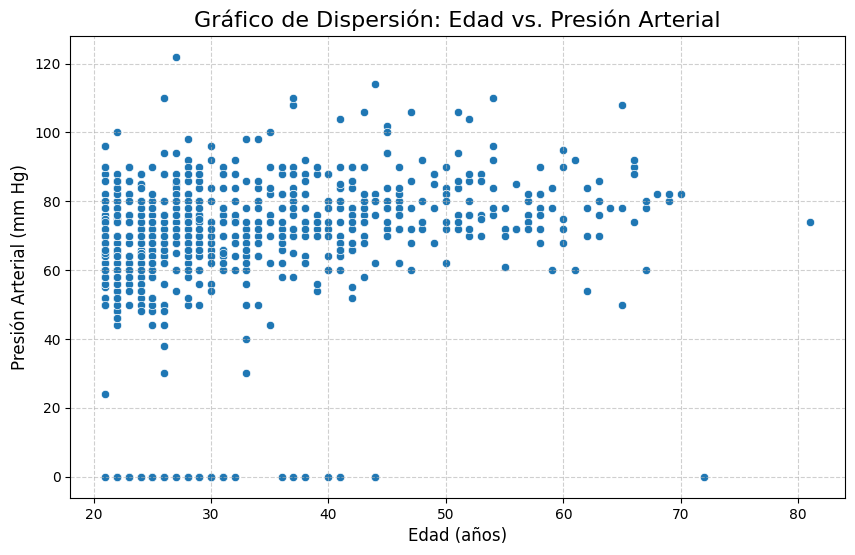

In [324]:
plt.figure(figsize=(10, 6)) # Ajustar el tamaño para una mejor visualización

sns.scatterplot(
    data=df,
    x='Age',
    y='BloodPressure'
)

# Añadir títulos y etiquetas para mayor claridad
plt.title('Gráfico de Dispersión: Edad vs. Presión Arterial', fontsize=16)
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Presión Arterial (mm Hg)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Feature Transformation

In [325]:
def countoutlier(df, col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25) #Inter-quartile range
    ul = (1.5 * iqr) + df[col].quantile(0.75) #upper limit
    ll = df[col].quantile(0.25) - (1.5 * iqr) #lower limit
    print(f'There are {(df[col] > ul).sum()} values greater than upper limit in {col} column')
    print(f'There are {(df[col] < ll).sum()} values less than lower limit in {col} column')
    print('')

In [326]:
for i in df.columns:
    countoutlier(df, i)

There are 4 values greater than upper limit in Pregnancies column
There are 0 values less than lower limit in Pregnancies column

There are 0 values greater than upper limit in Glucose column
There are 5 values less than lower limit in Glucose column

There are 7 values greater than upper limit in BloodPressure column
There are 38 values less than lower limit in BloodPressure column

There are 1 values greater than upper limit in SkinThickness column
There are 0 values less than lower limit in SkinThickness column

There are 34 values greater than upper limit in Insulin column
There are 0 values less than lower limit in Insulin column

There are 8 values greater than upper limit in BMI column
There are 11 values less than lower limit in BMI column

There are 29 values greater than upper limit in DiabetesPedigreeFunction column
There are 0 values less than lower limit in DiabetesPedigreeFunction column

There are 9 values greater than upper limit in Age column
There are 0 values less th

#### Treating Outliers

In [327]:
def treating(feature):
    global df
    limit_1 = df[feature].quantile(0.25)
    limit_3 = df[feature].quantile(0.75)
    iqr = limit_3 - limit_1
    lower_limit = limit_1 - 1.5 * iqr
    upper_limit = limit_3 + 1.5 * iqr

    df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]

In [328]:
treating("Insulin")
treating("Age")
treating("Glucose")
treating("BMI")
treating("Pregnancies")
treating("BloodPressure")
treating("SkinThickness")
treating("DiabetesPedigreeFunction")

In [329]:
df_original = pd.read_csv("diabetes.csv")

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

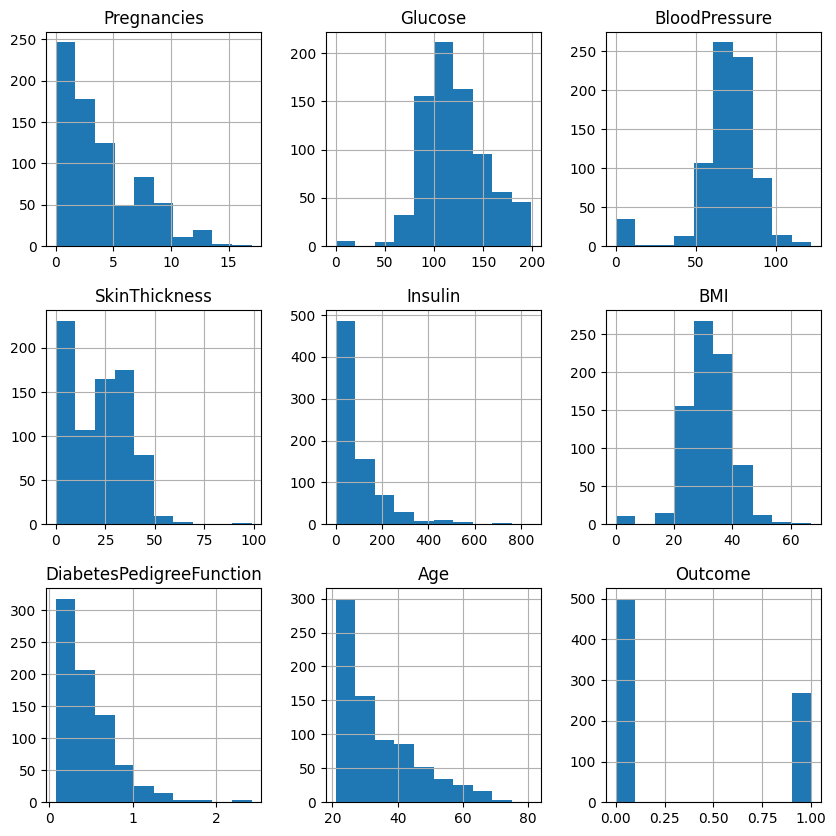

In [330]:
df_original.hist(figsize=(10,10))

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

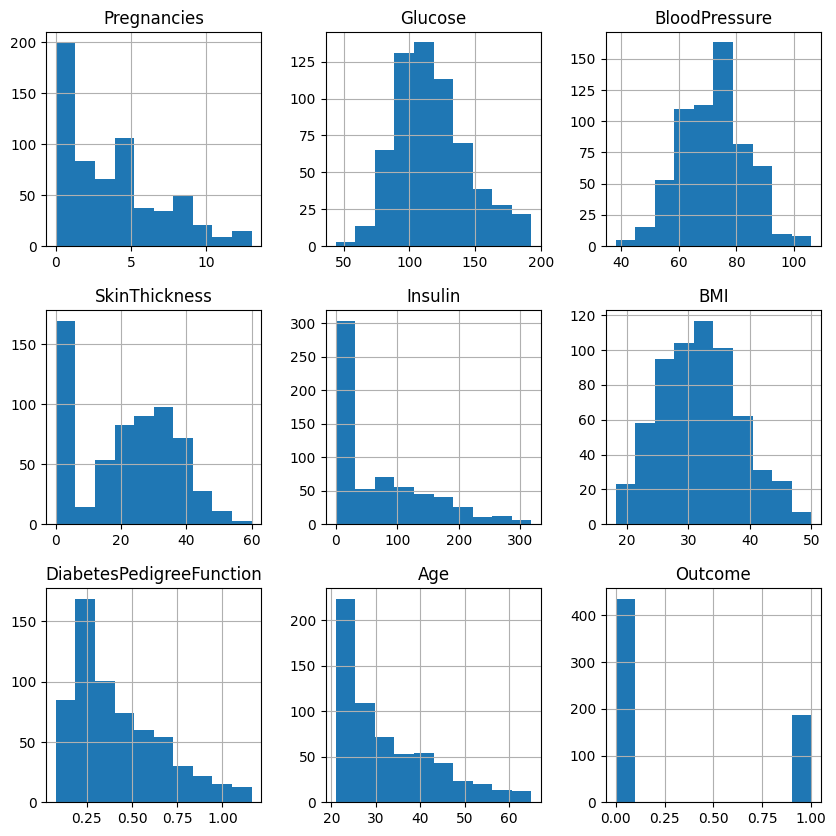

In [331]:
df.hist(figsize=(10,10))

# Machine Learning Models

In [332]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix


### Decision Tree Implementation

In [333]:
X = df.drop("Outcome", axis=1)
y = df['Outcome']

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [335]:
tree = DecisionTreeClassifier(max_depth=8, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [336]:
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.9257425742574258

<Axes: >

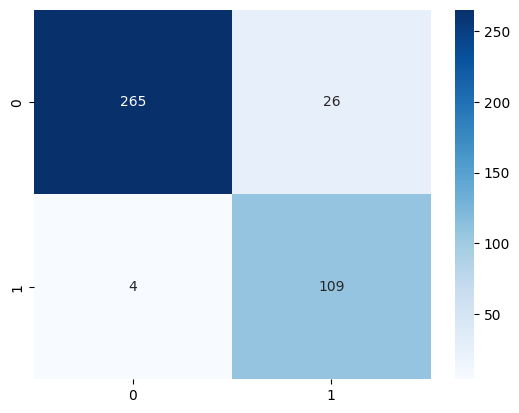

In [337]:
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt="d", cmap="Blues")

In [338]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.6712328767123288

<Axes: >

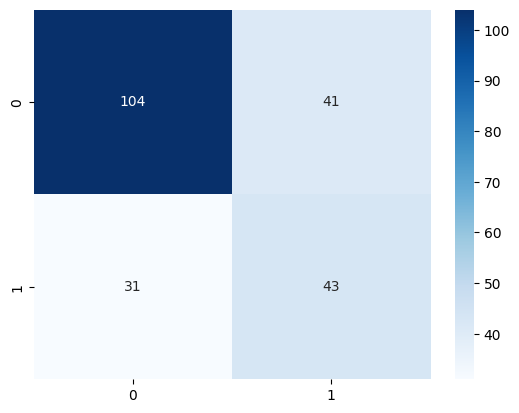

In [339]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")

In [340]:
param_grid = {
    "max_depth": [6, 8, 9, 10],
    "min_samples_split": [3, 5, 8, 10,12],
    "min_samples_leaf": [1,2,4,5,6,7],
    "criterion": ["gini", "entropy"]
}
# Configure and run the GridSearchCV to find the best parameters.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )
# Get the best performing model from the search.
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

In [341]:
y_pred = best_tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.8564356435643564

<Axes: >

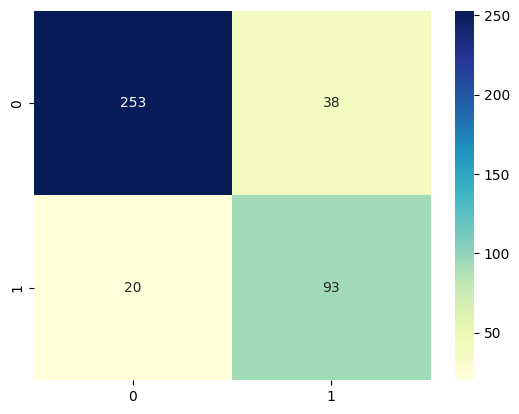

In [342]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot= True, fmt="d", cmap="YlGnBu")

In [343]:
y_pred = best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7168949771689498

<Axes: >

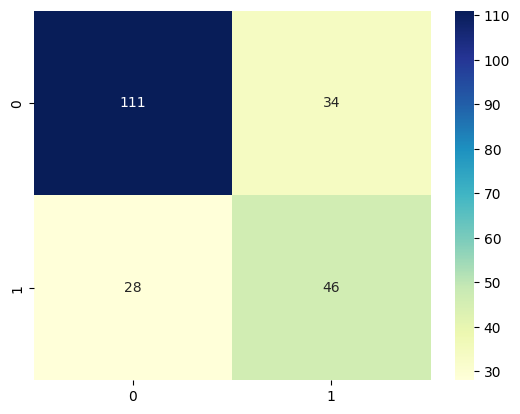

In [344]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt="d", cmap="YlGnBu")

#### Balance the Outcome

In [345]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [346]:
print(y_resampled.value_counts())

Outcome
1    436
0    436
Name: count, dtype: int64


In [347]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.35, random_state=42)

In [348]:
tree = DecisionTreeClassifier(max_depth=8, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [349]:
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.892226148409894

<Axes: >

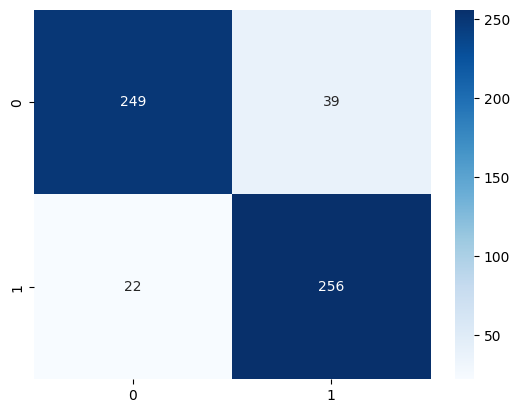

In [350]:
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt="d", cmap="Blues")

In [351]:
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.7679738562091504

<Axes: >

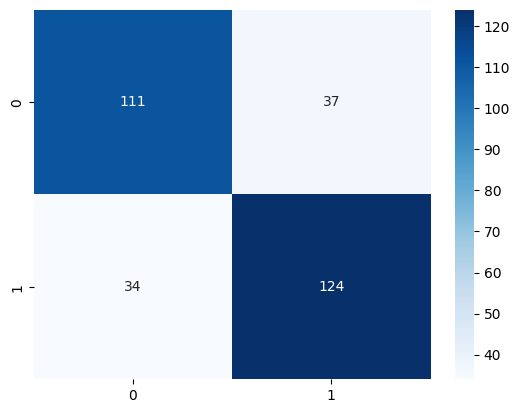

In [352]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")

#### Decision Tree(SMOTE) with Hyperparameter Tunning 

In [353]:
param_grid = {
    "max_depth": [6, 8, 9, 10],
    "min_samples_split": [3, 5, 8, 10,12],
    "min_samples_leaf": [1,2,4,5,6,7],
    "criterion": ["gini", "entropy"]
}
# Configure and run the GridSearchCV to find the best parameters.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )
# Get the best performing model from the search.
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

In [354]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=3, random_state=42)

In [355]:
y_pred = best_tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.8392226148409894

<Axes: >

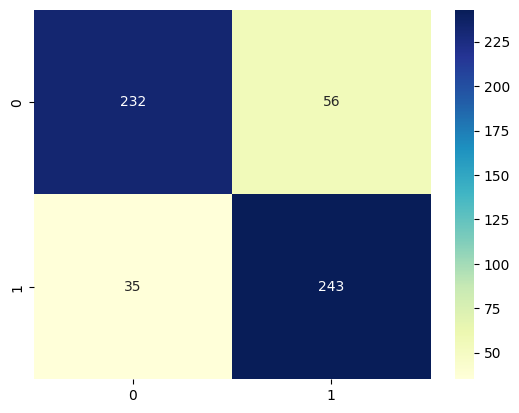

In [356]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot= True, fmt="d", cmap="YlGnBu")

In [357]:
y_pred = best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7647058823529411

<Axes: >

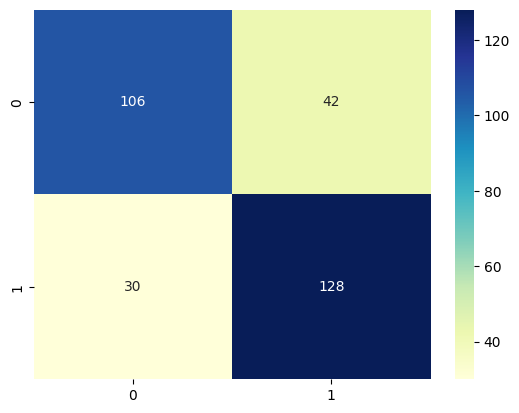

In [358]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt="d", cmap="YlGnBu")

### Logistic Regression Implementation

In [359]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("Outcome", axis=1))

In [360]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop("Outcome", axis=1).columns)
X_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.694245,1.097964,0.003818,0.934071,-0.834471,0.250216,0.831639,1.645924
1,-0.847147,-1.179129,-0.524733,0.541231,-0.834471,-0.835438,-0.298383,-0.126529
2,1.310802,2.363016,-0.700916,-1.357492,-0.834471,-1.347246,1.015882,-0.033242
3,-0.847147,-1.034552,-0.524733,0.148392,0.360733,-0.602798,-1.051731,-1.059399
4,0.385967,-0.058655,0.180001,-1.357492,-0.834471,-0.990531,-0.912526,-0.219816
...,...,...,...,...,...,...,...,...
618,1.927359,-0.600820,0.356185,1.785223,1.454217,0.141650,-1.035354,2.858656
619,-0.538869,0.158211,-0.172366,0.410285,-0.834471,0.746514,-0.343420,-0.499677
620,0.385967,0.122067,0.003818,0.148392,0.589601,-0.897475,-0.732377,-0.219816
621,-0.847147,0.302789,-1.053284,-1.357492,-0.834471,-0.292611,-0.306572,1.366063


In [361]:
X = X_scaled_df
y = df["Outcome"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.35, random_state=42)

In [363]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [364]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred)

0.7579505300353356

<Axes: >

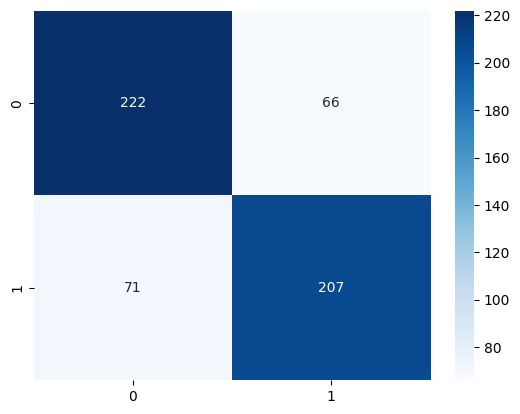

In [365]:
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt="d", cmap="Blues")

In [366]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7483660130718954

<Axes: >

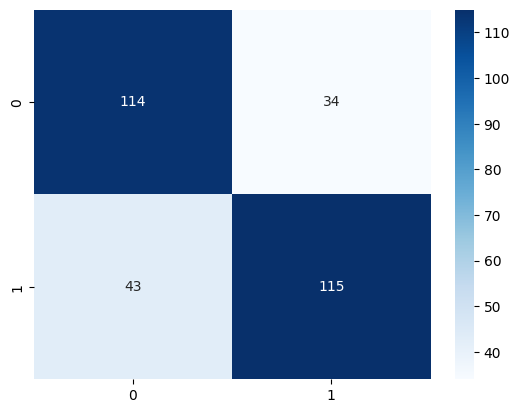

In [367]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")

#### Random Forest Implementation

In [368]:
X = df.drop(columns="Outcome", axis=1)
y = df["Outcome"]

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [370]:
forest = RandomForestClassifier(n_estimators=200, max_depth= 6, random_state=42)

In [371]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [372]:
y_pred = forest.predict(X_train)
accuracy_score(y_train, y_pred)

0.948019801980198

In [373]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.7488584474885844

<Axes: >

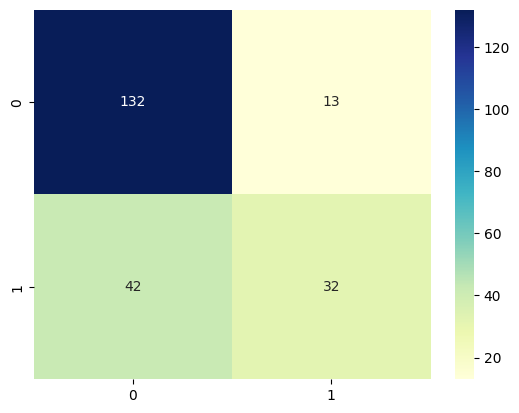

In [374]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")

#### Random Forest with Hyperparameter Tunning

In [375]:
param_grid = {
    "n_estimators": [100,200,300,400,500],
    "max_depth" : [6,8,10,12,14],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True,False]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [6, 8, 10, 12, 14],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [376]:
best_forest = grid_search.best_estimator_  
best_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [377]:
y_pred =best_forest.predict(X_train)
accuracy_score(y_pred, y_train)

0.9925742574257426

In [378]:
y_pred =best_forest.predict(X_test)
accuracy_score(y_pred, y_test)

0.7351598173515982

<Axes: >

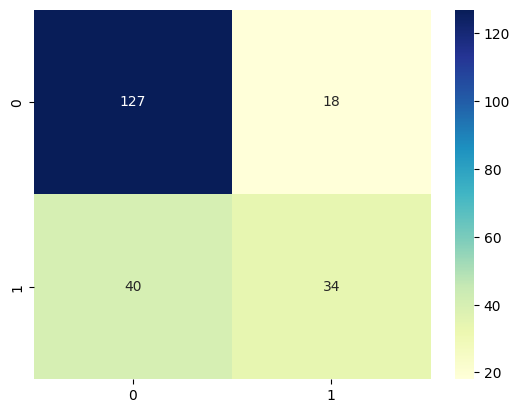

In [379]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="d")

#### Random Forest with Smote "Balancing the DataSet"

In [380]:
X = df.drop(columns="Outcome", axis=1)
y = df["Outcome"]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.35, random_state=42)

In [382]:
forest = RandomForestClassifier(n_estimators=200, max_depth= 6, random_state=42)

In [383]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [384]:
y_pred = forest.predict(X_train)
accuracy_score(y_train, y_pred)

0.8992932862190812

In [385]:
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.7908496732026143

<Axes: >

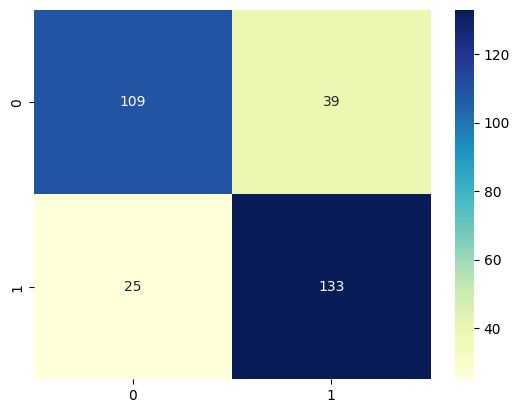

In [386]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")

#### Random Forest(Smoted) with Hyperparameter Tunning

In [387]:
param_grid = {
    "n_estimators": [100,200,300,400,500],
    "max_depth" : [6,8,10,12,14],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True,False]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [6, 8, 10, 12, 14],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [388]:
best_forest = grid_search.best_estimator_
best_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [389]:
y_pred =best_forest.predict(X_train)
accuracy_score(y_pred, y_train)

0.980565371024735

In [390]:
y_pred =best_forest.predict(X_test)
accuracy_score(y_pred, y_test)

0.8104575163398693

<Axes: >

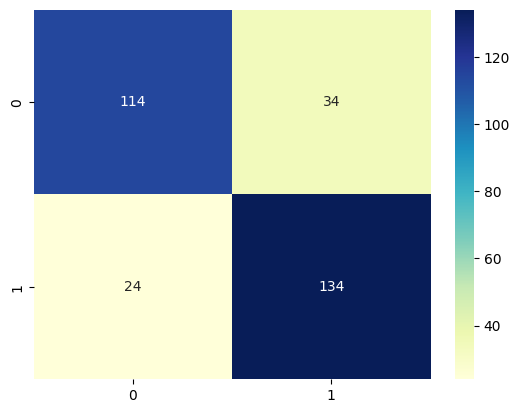

In [391]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt="d")